# Scandinavian wolves dataset analysis
## Start with requiered libraries
You should install pandas, scipy, and for graphics there should be seaborn installed and matplotlib
In conda promt write the following code:
conda install pandas scipy seaborn matplotlib

Also there should be the output folder in the same folder as its the python notebook installed


In [1]:
import pandas as pd
from os import listdir
import scipy.stats as st

Here are placed the requiered data to do the analysis.

**ypg** (years per generation),(int number) as GONE way of calculation it's meant as number of generations it's necessary to use the data that comes from the GONE output that estimates Ne per generation to a year

**starting_year** (year that the data is extracted) where we should place the generation 1

**generation_length** Number of generations that we will work on

**folder** Name of the folder that is in the same root as it's running this notebook which contains the data from GONE output

**startingyearnc** Year that the nc data begin (the most recent year)

In [2]:
#year per generation for the GONE DATA
ypg=4
starting_year=2012
generation_length=100 #Number of generations
#Working folder
folder="Minnessota"

### In the next cell:
It lists all the files in a specified folder and stores them in a list called filelist that is converted into pandas Series
It creates a list numlist of strings from “p1” to “p9” and then from “10” to the length of filelist that is converted into pandas Series.
It iterates over filelistdf and numlistdf. If the last two characters of a filename in filelistdf match a number in numlistdf, it replaces the number in numlistdf with the filename.
This make possible to preparate a sorted list of filenames to be able to open them alter to join in a single dataset

In [3]:
#PandasSeries version
filelist=listdir("./"+folder)
filelistdf=pd.Series(filelist)
numlist=[]
for i in range(1,10):
    numlist.append("p"+str(i))
for i in range(10,len(filelist)+1):
    numlist.append(str(i))
    
numlistdf=pd.Series(numlist)

for index1, filename in filelistdf.items():
    for index2, num in numlistdf.items():
        if filename[-2:]==num:
            numlistdf.replace(num,filename,inplace=True)


### Data join and dataframe creation
In this cell we open all the files listed before to join them in a single dataset, joined column by column
The type of data it's float64, and the final dataframe called dataframe it's the output data joined by columns the final.
Finally the dataframe is invoked to see if the data was ingested correctly, if you use this script please check with your current data before doing further progress

In [4]:
dataframe=pd.DataFrame([])
for index,filename in filelistdf.items():
        df=pd.read_table("./"+folder+"/"+filename,usecols=[1],header=None) #For minnesota
        #df=pd.read_csv("./"+folder+"/"+filename,sep="\t") #For scandinavia
        df=df.iloc[1:generation_length+1]
        df=df.astype('float64')
        dataframe=pd.concat([dataframe,df],axis=1)

dataframe

,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,225.920,236.303,197.176,254.169,212.706,357.387,255.052,302.518,242.588,223.264,...,301.806,283.738,244.141,307.210,326.641,370.586,304.436,207.718,366.964,285.204
2,225.920,236.303,197.176,254.169,212.706,357.387,255.052,302.518,242.588,223.264,...,301.806,283.738,244.141,307.210,326.641,370.586,304.436,207.718,366.964,285.204
3,225.920,236.303,197.176,254.169,212.706,357.387,255.052,302.518,242.588,223.264,...,301.806,283.738,244.141,307.210,326.641,370.586,304.436,207.718,366.964,285.204
4,220.766,219.861,203.023,249.210,221.649,312.077,253.955,294.189,236.759,222.046,...,266.922,258.411,234.559,269.147,312.287,290.515,262.724,209.944,315.984,256.759
5,220.387,218.912,206.009,248.576,223.594,306.430,253.842,291.047,236.760,222.269,...,254.217,252.412,230.669,264.311,295.265,285.134,258.254,210.300,324.908,254.924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,6706.430,5890.770,5983.980,7373.290,5837.920,4961.110,5369.350,6156.510,6345.340,5386.990,...,5279.600,5072.050,6193.750,4801.500,4963.320,5318.950,5344.920,5524.940,4983.320,6165.440
97,6591.680,5888.240,5930.290,7403.930,5911.250,4961.660,5427.950,6088.280,6297.350,5391.160,...,5311.080,5067.240,6139.090,4825.890,4944.370,5211.480,5320.500,5608.490,4924.970,6197.120
98,6563.910,5817.040,5948.470,7367.310,5959.990,4945.180,5494.770,5986.940,6347.340,5316.760,...,5325.060,4999.830,6015.720,4838.880,4922.850,5231.850,5264.300,5650.860,4863.880,6159.520
99,6551.020,5744.340,6020.270,7313.490,6012.150,4866.100,5568.970,5858.830,6390.120,5323.990,...,5319.200,4994.130,5911.280,4976.020,4904.540,5152.260,5213.230,5808.310,4866.700,6243.740


### Median and interval of confidence calculation
Then the median and the weight are calculated using scipy, line by line.
After that the confidence intervals are calculated using the scipy t.interval for Students't function, with a 95% confidence, using the weight as a scale line by line too. For further reference on this line please visit the [scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html)

In [5]:
mean=dataframe.median(axis=1)
weight=st.sem(dataframe, axis=1)
#t distribution at 95%
try:
    minint,maxint=st.t.interval(confidence=0.95, df=len(dataframe)-1, loc=mean, scale=weight)
except:
    minint,maxint=st.t.interval(alpha=0.95, df=len(dataframe)-1, loc=mean, scale=weight)
#Exception have been added to add compatiblity with scipy < 1.11.0 see: https://docs.scipy.org/doc/scipy/release/1.11.0-notes.html

### Scipy-->Pandas
Results converted into pandas dataframe from scipy vector

In [6]:
minintdf=pd.DataFrame(minint)
maxintdf=pd.DataFrame(maxint)
meandf=pd.DataFrame(mean)
minintdf.reset_index(drop=True, inplace=True)
maxintdf.reset_index(drop=True, inplace=True)
meandf.reset_index(drop=True, inplace=True)

### Year list preparation
The new index will be on years instead of generations so a new dataframe it's created that will be used as this list

In [7]:
yearlist=[]
for i in range(0,generation_length+1):
    yearlist.append(starting_year-(i*ypg))
print(yearlist)
yearlistdf=pd.DataFrame(yearlist)


[2012, 2008, 2004, 2000, 1996, 1992, 1988, 1984, 1980, 1976, 1972, 1968, 1964, 1960, 1956, 1952, 1948, 1944, 1940, 1936, 1932, 1928, 1924, 1920, 1916, 1912, 1908, 1904, 1900, 1896, 1892, 1888, 1884, 1880, 1876, 1872, 1868, 1864, 1860, 1856, 1852, 1848, 1844, 1840, 1836, 1832, 1828, 1824, 1820, 1816, 1812, 1808, 1804, 1800, 1796, 1792, 1788, 1784, 1780, 1776, 1772, 1768, 1764, 1760, 1756, 1752, 1748, 1744, 1740, 1736, 1732, 1728, 1724, 1720, 1716, 1712, 1708, 1704, 1700, 1696, 1692, 1688, 1684, 1680, 1676, 1672, 1668, 1664, 1660, 1656, 1652, 1648, 1644, 1640, 1636, 1632, 1628, 1624, 1620, 1616, 1612]


### New index by generations
First the actual index of the dataframe it's eliminated.
A simple index refering to generation numerically it's made as a Dataframe

In [8]:
dataframe.reset_index(drop=True, inplace=True)
newindex=[]
for i in range(1,generation_length):
    newindex.append(i)
indexdf=pd.DataFrame(newindex)

### Data joining
The data from the results of the calculations, the median and the interval of confidence are joined in a single dataframe called "dataf"
then this dataframe is also joined with the main dataframe called "dataframe"

In [9]:
dataf=pd.concat([maxintdf,meandf,minintdf],axis=1)
dataframe=pd.concat([dataframe,dataf],axis=1)

### Generations and years concatenated to the dataframe
The previously generated dataframe regarding the years called indexdf it's joined with the "dataframe" also the "yearlistdf" regarding the year of each ocurrence it's concatenated too.

In [10]:
dataframe=pd.concat([dataframe,indexdf],axis=1)
dataframe=pd.concat([dataframe,yearlistdf],axis=1)

### New column assignation
The Columns are given a name each one, when regarding the data it's called a "rep" from 1 to 40, and then the desviation, generation and year are titled

In [11]:
newindexnames=[]
for i in range(1,41):
    newindexnames.append("Rep_"+str(i))
newindexnames.append("Maxdesv")
newindexnames.append("Mean")
newindexnames.append("Mindesv")
newindexnames.append("Generation")
newindexnames.append("Year")
dataframe.columns=newindexnames

### New index
Now with the dataset created it's possible to use the 'year' column as a reference for the year of each generation

In [12]:
dataframe=dataframe.set_index('Year')

### Export file
The principal dataframe is exported

In [13]:
dataframe.to_csv("Export"+folder+".csv")

### Median data and interval of confidence dataset ready to plot
The yearlist it's also joined with the dataf dataset that we could use to plot

In [14]:
dataf=pd.concat([dataf,yearlistdf],axis=1)

### Calculated data ready to export
Add all the columns to the "dataf" dataset and export to csv and to excel.

In [15]:
datafindexnames=[]
datafindexnames.append("Maxdesv")
datafindexnames.append("Mean")
datafindexnames.append("Mindesv")
datafindexnames.append("Year")
dataf.columns=datafindexnames
dataf=dataf.set_index('Year')
dataf.to_csv('NedataMinnesota.csv')
dataf.to_excel('NedataMinnesota.xlsx')

# Graphics
Here start the graphics part so some libraries are requiered, as this part is optional, the dependencies on this part are written here, the libaries requiered are [matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/) it can be installed with the follwing commands

Anaconda
```bash
conda install pandas scipy seaborn matplotlib
```

pip
```bash
pip install pandas scipy seaborn matplotlib
```

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt    # v 3.3.2

### Plot of the whole data from the 100 chosen generations and the intervals of confidence plotted with them
The graphic is also exported as a png file

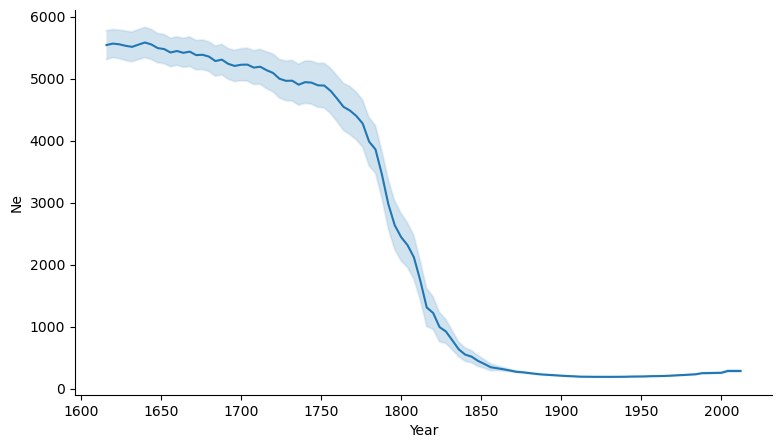

In [17]:
x= dataframe.index
mean = dataframe.Mean
lower = dataframe.Mindesv
upper = dataframe.Maxdesv

fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, mean, label='signal mean')
ax.plot(x, lower, color='tab:blue', alpha=0.1)
ax.plot(x, upper, color='tab:blue', alpha=0.1)
ax.fill_between(x, lower, upper, alpha=0.2)
ax.set_xlabel('Year')
ax.set_ylabel('Ne')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()
fig.savefig('Minnesotaplot1.png') 

Diferent plot of the whole 100 generations using seaborn instead of matplotlib

In [18]:
from seaborn import lineplot

Text(0, 0.5, 'Ne')

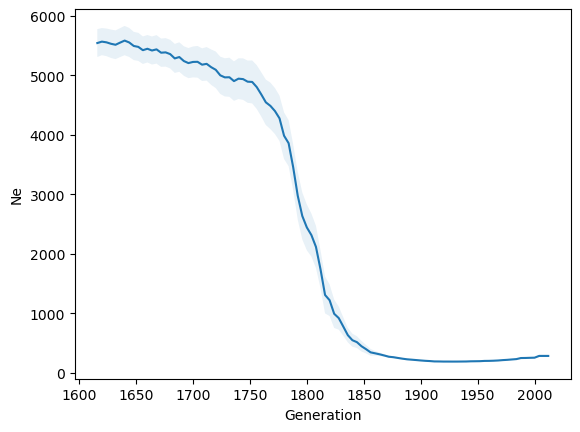

In [19]:
ax = lineplot(data=dataframe, x=dataframe.index, y="Mean")
ax.fill_between(dataframe.index, lower, upper, alpha=0.1)
ax.set_xlabel('Generation')
ax.set_ylabel('Ne')

## Create a subset that only include from 1900 on

In [20]:
#generate a subset
subset=dataframe.iloc[0:29]
x= subset.index
mean = subset.Mean
lower = subset.Mindesv
upper = subset.Maxdesv

In [21]:
subset

,Rep_1,Rep_2,Rep_3,Rep_4,Rep_5,Rep_6,Rep_7,Rep_8,Rep_9,Rep_10,...,Rep_35,Rep_36,Rep_37,Rep_38,Rep_39,Rep_40,Maxdesv,Mean,Mindesv,Generation
Year,,,,,,,,,,,,,,,,,,,,,
2012,225.920,236.303,197.176,254.169,212.706,357.387,255.052,302.518,242.588,223.264,...,326.641,370.586,304.436,207.718,366.964,285.204,303.066867,284.4710,265.875133,1.0
2008,225.920,236.303,197.176,254.169,212.706,357.387,255.052,302.518,242.588,223.264,...,326.641,370.586,304.436,207.718,366.964,285.204,303.066867,284.4710,265.875133,2.0
2004,225.920,236.303,197.176,254.169,212.706,357.387,255.052,302.518,242.588,223.264,...,326.641,370.586,304.436,207.718,366.964,285.204,303.066867,284.4710,265.875133,3.0
2000,220.766,219.861,203.023,249.210,221.649,312.077,253.955,294.189,236.759,222.046,...,312.287,290.515,262.724,209.944,315.984,256.759,266.895706,255.0075,243.119294,4.0
1996,220.387,218.912,206.009,248.576,223.594,306.430,253.842,291.047,236.760,222.269,...,295.265,285.134,258.254,210.300,324.908,254.924,263.777135,252.8690,241.960865,5.0
1992,221.047,218.517,206.444,247.296,224.008,289.870,246.963,290.417,236.802,221.696,...,281.655,278.828,256.605,210.043,322.535,254.270,259.913770,250.2860,240.658230,6.0
1988,220.888,218.067,206.320,246.987,224.023,288.577,245.238,283.260,236.947,221.362,...,273.349,276.104,253.139,210.002,316.662,252.928,258.151470,249.0640,239.976530,7.0
1984,221.950,219.538,207.601,239.887,226.175,230.685,239.170,263.585,239.829,217.500,...,230.298,244.830,234.373,210.946,274.172,237.447,236.423326,231.1495,225.875674,8.0
1980,221.315,217.352,208.456,233.454,225.057,221.875,237.952,256.758,237.883,216.812,...,225.225,235.346,230.678,210.180,237.982,232.370,229.430282,225.1410,220.851718,9.0
